In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
style.use('ggplot')

In [4]:
rc('image', aspect='equal', cmap='viridis')

In [5]:
data_path = '/home/data/ccdb/astrocytes'

In [6]:
cd $data_path

/home/data/ccdb/astrocytes


In [7]:
cd 4wk-both6/


/home/data/ccdb/astrocytes/4wk-both6


In [8]:
names = !ls *.pic
print names

['4wk-both6-grn-raw.pic', '4wk-both6-red-raw.pic']


In [9]:
def read_pic(name):
    fid = open(name, 'rb')
    nx,ny,nz = map(int, np.fromfile(fid, uint16, 3))
    start_frames = 0x4c
    fid.seek(start_frames,0)
    frames = np.fromfile(fid, uint8, nx*ny*nz).reshape(nz,nx,ny)
    
    meta_start = start_frames + nx*ny*nz + 0x10
    meta = load_meta(fid, meta_start)
    return frames, meta

def load_meta(fid, meta_start, nread=38):
    acc = []
    step = 0x60
    fid.seek(meta_start,0)
    for k in range(0,nread):
        entry = fid.read(0x30).strip('\x00')
        acc.append(entry)
        fid.seek(0x30,1)
    return acc

def get_axes(meta):
    ax_info = [e for e in meta if 'axis' in e.lower() and 'microns' in e.lower()]
    acc = []
    for ax in ax_info:
        x = ax.split()[-2:]
        acc.append((float(x[0]), x[1]))
        
    return acc

In [10]:
x,meta = read_pic(names[1])

In [11]:
get_axes(meta)

[(0.1027778, 'Microns'), (0.1027778, 'Microns'), (0.2, 'Microns')]

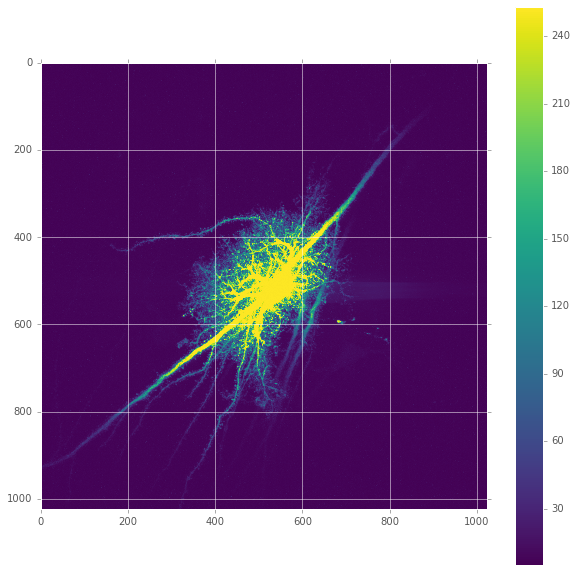

In [12]:
figure(figsize=(10,10))
imshow(x.max(0)); colorbar()

In [13]:
from skimage.filters import threshold_otsu, rank

In [14]:
tm = threshold_otsu(x.max(0))

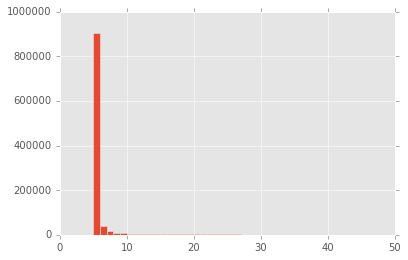

In [15]:
_ = hist(ravel(x.mean(0)), range(0,50,1),)

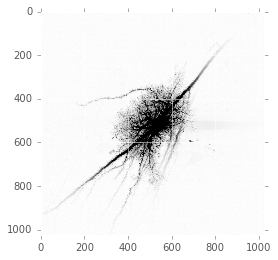

In [16]:
imshow(x.max(0),cmap='gray_r')

In [17]:
x.max(0).min()

5

In [18]:
percentile(x.max(0), (0, 5, 10, 25, 50, 75, 90, 95, 100))

array([   5.,    6.,    6.,    7.,    7.,    9.,   29.,  100.,  253.])

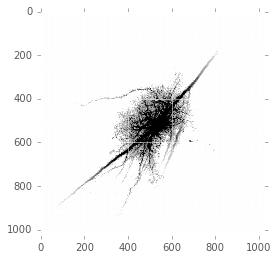

In [19]:
imshow(x.max(0)*(x.max(0)>30), cmap='gray_r')

In [20]:
points = array(where(x.max(0) > 30))

In [21]:
points

array([[148, 150, 158, ..., 955, 957, 957],
       [804, 805, 787, ..., 334, 316, 332]])

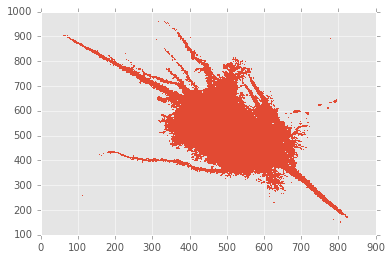

In [22]:
plot(points[1], points[0], ',')

In [25]:
from imfun import bwmorph, lib

In [26]:
r = bwmorph.contiguous_regions(x.max(0)>30)

In [27]:
rx = r[0]

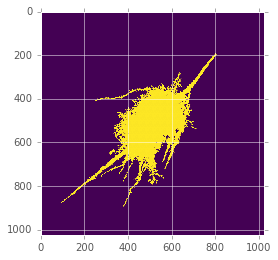

In [28]:
imshow(rx.tomask())

In [29]:
len(rx.locs)

98397

In [30]:
m = rx.tomask()

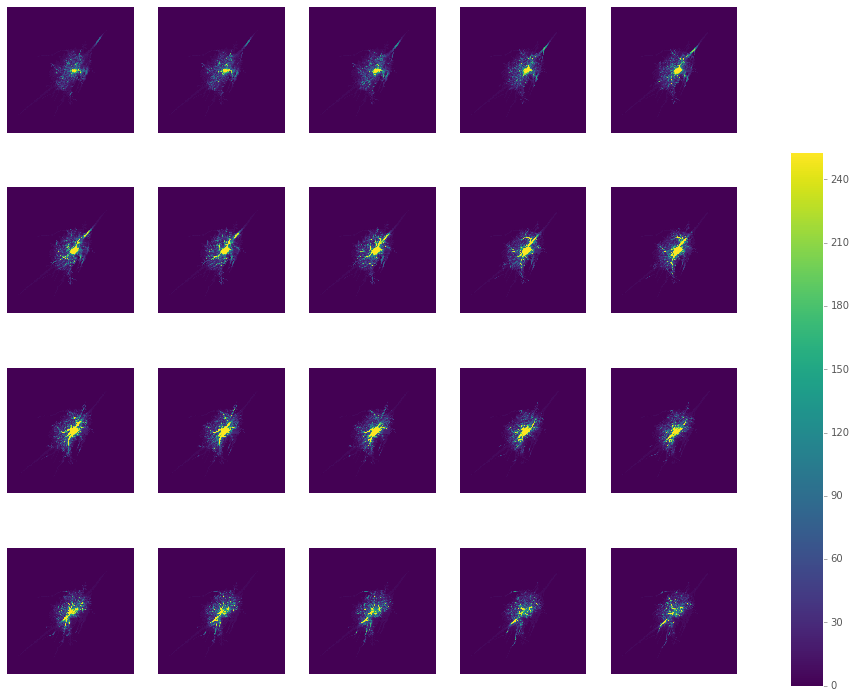

In [33]:
lib.group_maps([a*m for a in x[15:35]],5, figscale=3)

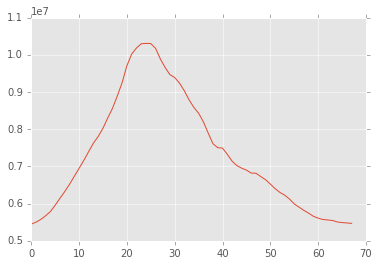

In [34]:
plot(x.sum(-1).sum(-1))

In [35]:
selected = data_path + '/selected/'

In [36]:
files = !ls $selected/*.pic

In [37]:
files = [f for f in files if not 'hm' in f]
files

['/home/data/ccdb/astrocytes/selected//4wk-ly10-raw.pic',
 '/home/data/ccdb/astrocytes/selected//4wk-ly11-raw.pic',
 '/home/data/ccdb/astrocytes/selected//4wk-ly12-raw.pic',
 '/home/data/ccdb/astrocytes/selected//4wk-ly13-raw.pic',
 '/home/data/ccdb/astrocytes/selected//4wk-ly14-raw.pic',
 '/home/data/ccdb/astrocytes/selected//4wk-ly15-raw.pic',
 '/home/data/ccdb/astrocytes/selected//4wk-ly16-raw.pic',
 '/home/data/ccdb/astrocytes/selected//4wk-ly17-raw.pic',
 '/home/data/ccdb/astrocytes/selected//4wk-ly18-raw.pic',
 '/home/data/ccdb/astrocytes/selected//4wk-ly19-raw.pic',
 '/home/data/ccdb/astrocytes/selected//4wk-ly1-raw.pic',
 '/home/data/ccdb/astrocytes/selected//4wk-ly20-raw.pic',
 '/home/data/ccdb/astrocytes/selected//4wk-ly21-raw.pic',
 '/home/data/ccdb/astrocytes/selected//4wk-ly22-raw.pic',
 '/home/data/ccdb/astrocytes/selected//4wk-ly23-raw.pic',
 '/home/data/ccdb/astrocytes/selected//4wk-ly24-raw.pic',
 '/home/data/ccdb/astrocytes/selected//4wk-ly25-raw.pic',
 '/home/data/cc

In [38]:
stacks = map(read_pic, files)

In [39]:
scales = [get_axes(s[1]) for s in stacks]

In [40]:
scales

[[(0.08222222, 'Microns'), (0.08222222, 'Microns'), (0.2, 'Microns')],
 [(0.07708333, 'Microns'), (0.07708333, 'Microns'), (0.2, 'Microns')],
 [(0.07254902, 'Microns'), (0.07254902, 'Microns'), (0.2, 'Microns')],
 [(0.07254902, 'Microns'), (0.07254902, 'Microns'), (0.2, 'Microns')],
 [(0.07254902, 'Microns'), (0.07254902, 'Microns'), (0.25, 'Microns')],
 [(0.07708333, 'Microns'), (0.07708333, 'Microns'), (0.2, 'Microns')],
 [(0.07708333, 'Microns'), (0.07708333, 'Microns'), (0.2, 'Microns')],
 [(0.06851852, 'Microns'), (0.06851852, 'Microns'), (0.2, 'Microns')],
 [(0.06166667, 'Microns'), (0.06166667, 'Microns'), (0.2, 'Microns')],
 [(0.07708333, 'Microns'), (0.07708333, 'Microns'), (0.2, 'Microns')],
 [(0.0560606, 'Microns'), (0.0560606, 'Microns'), (0.2, 'Microns')],
 [(0.06491228, 'Microns'), (0.06491228, 'Microns'), (0.2, 'Microns')],
 [(0.07254902, 'Microns'), (0.07254902, 'Microns'), (0.2, 'Microns')],
 [(0.06851852, 'Microns'), (0.06851852, 'Microns'), (0.2, 'Microns')],
 [(0.06

In [ ]:
projections_av = [np.mean(s[0]*1.0,axis=0) for s in stacks]
projections_mx = [np.max(s[0]*1.0,axis=0) for s in stacks]

[  5.47058824  42.11764706]


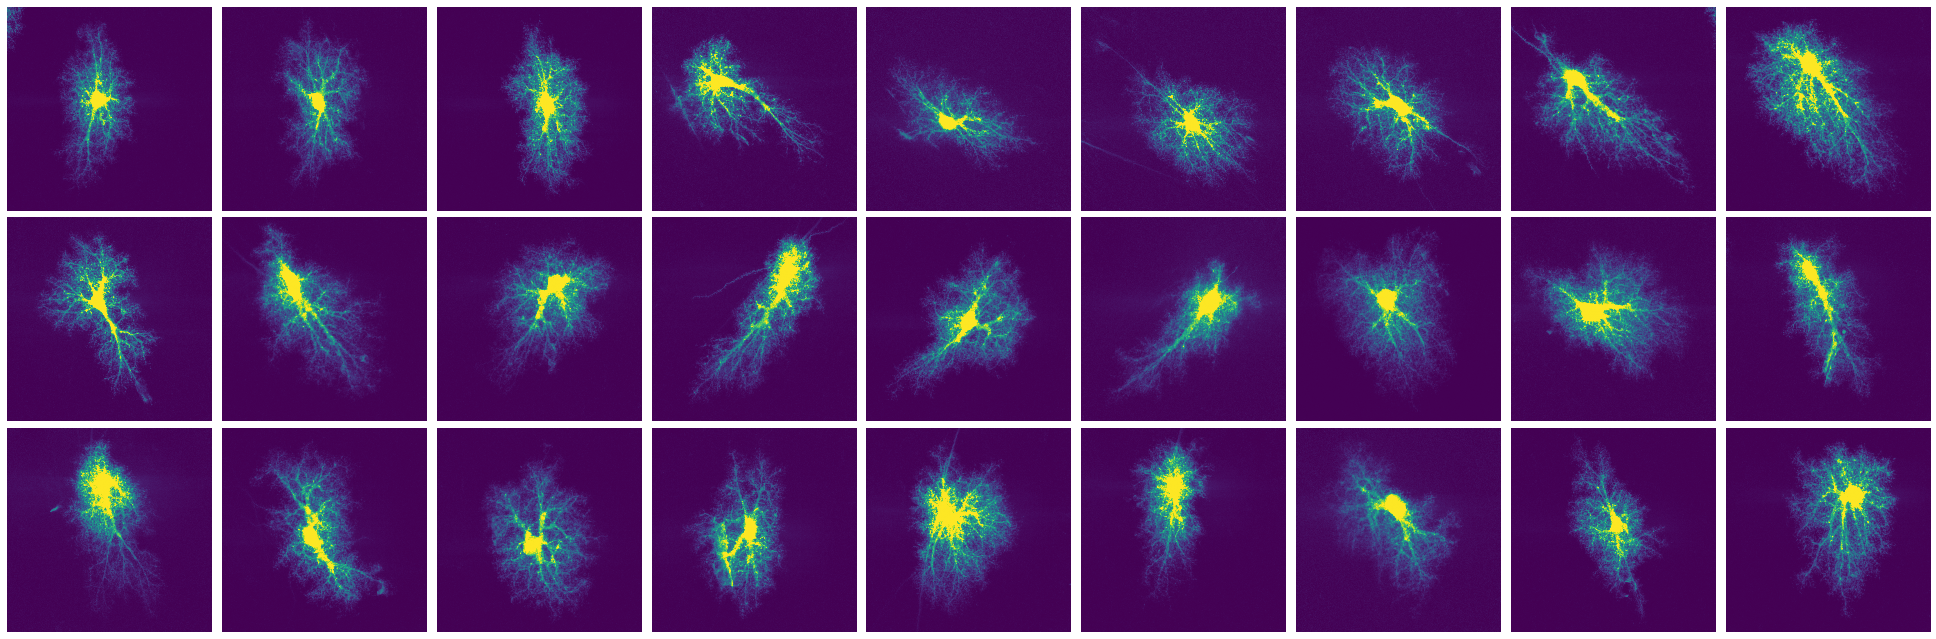

In [49]:
cl = np.percentile(projections_av, (10,99))
print cl

lib.group_maps(projections_av, 9, figscale=3, samerange=False,imkw=dict(clim=cl))
#suptitle('Average projections of real astrocytes', fontsize=18)
tight_layout()

In [50]:
scales0 = [s[0][0] for s in scales]
scales0[0]

0.08222222

In [51]:
from scipy import ndimage

In [52]:
from skimage.transform import resize as skresize

In [53]:
from scipy.ndimage.interpolation import map_coordinates

In [55]:
mean_scale = mean(scales0)

zoomed_av = [ndimage.zoom(p,mean_scale/s) for p,s in zip(projections_av, scales0)]
zoomed_mx = [ndimage.zoom(p,mean_scale/s) for p,s in zip(projections_mx, scales0)]

/home/brazhe/opt/anaconda/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [63]:
mean_scale

0.068573277037037028

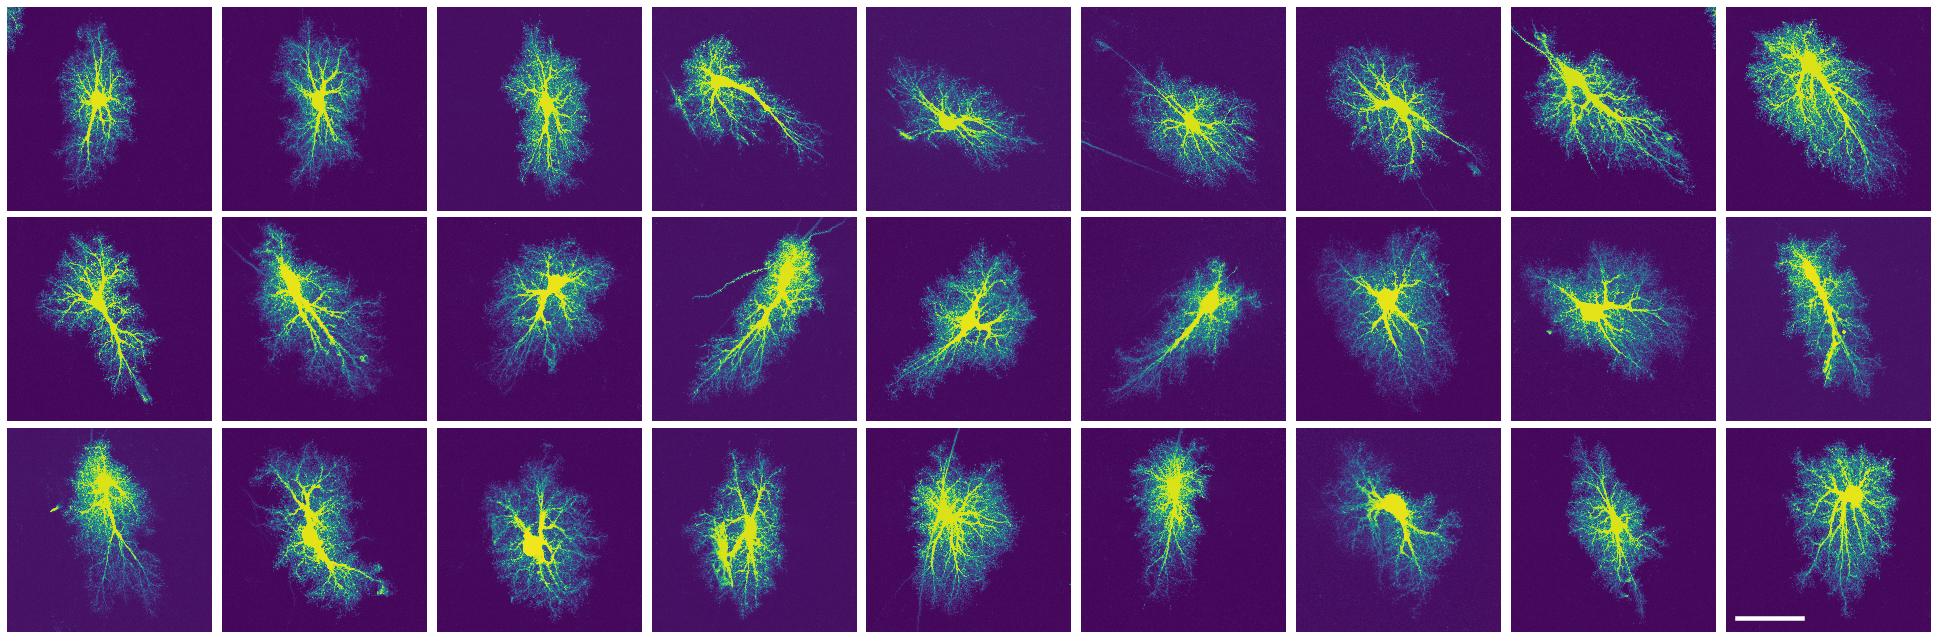

In [68]:
lib.group_maps(zoomed_mx, 9, samerange=False, figscale=3)
ax = gcf().axes[-1]
r = Rectangle((50,1000), 25/mean_scale, 20, edgecolor='white',fc='white')
ax.add_patch(r)
tight_layout()
#suptitle('Average projections of real astrocytes (resampled to same scale)', fontsize=20)

## Now, arranging them in the field of view

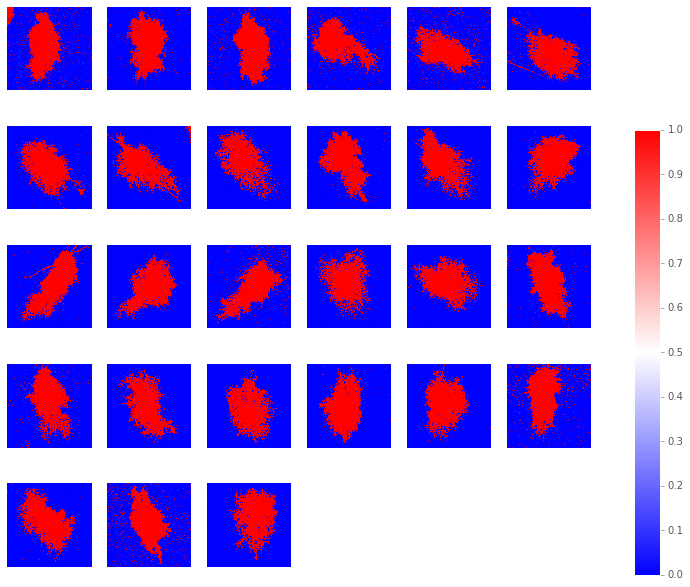

In [70]:
masks = [z>np.percentile(z,75) for z in zoomed_mx]
lib.group_maps(masks,6, imkw = dict(cmap=cm.bwr))

In [71]:
import morphsnakes

In [72]:
def auto_levelset(data):
    #return data > threshold_otsu(data)
    return data > percentile(data, 75)

from scipy import ndimage
def largest_region(pmask):
    lx,n = ndimage.label(pmask,)
    weights = [sum(lx==i+1) for i in range(n)]
    return lx==argmax(weights)+1

In [75]:
def auto_mask(image, make_plot=False,lambda1=1,lambda2=1,smoothing=2):
    mf = image
    macwe = morphsnakes.MorphACWE(mf, levelset=auto_levelset(mf), 
                                  lambda1=lambda1, 
                                  lambda2=lambda2, 
                                  smoothing=smoothing)
    %time macwe.run(500)

    mask = largest_region(macwe.levelset)
    if make_plot:
        figure()
        imshow(mf, cmap='gray');
        contour(macwe.levelset, levels=[0], colors=['r'])
        contourf(mask, levels=[0.9,1.1], colors=['g'], alpha=0.5)
        grid(False)
    return mask

In [74]:
np.save('/home/brazhe/yandex-disk/dev/notebooks/storage/astrocyte_zoomed_projections', [zoomed_av, zoomed_mx])